# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

!pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact


## Indest Data

In [6]:
df = pd.read_csv("Frozen_Dessert_Production.csv", parse_dates=['DATE'], index_col="DATE")

In [7]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
1972-06-01,100.596
1972-07-01,100.126
1972-08-01,96.361
1972-09-01,85.801


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

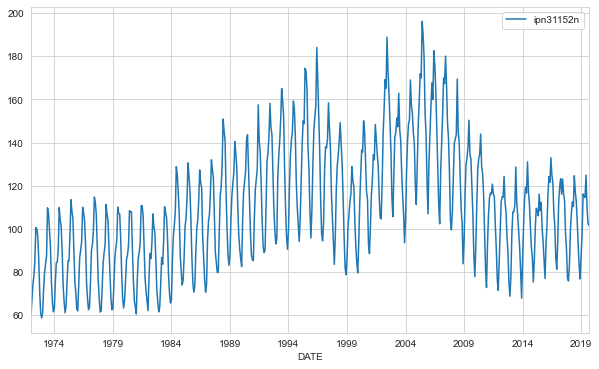

In [13]:

df.plot();


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ipn31152n  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


## Preprocessing of Data

### Train Test Split

In [15]:
len(df)

573

In [18]:
test_size = 24
test_size

24

In [19]:
train = 573 - 24
train

549

In [20]:
test_ind = len(df)- test_size
test_ind

549

In [21]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
len(train), len(test)

(549, 24)

In [24]:
train.head(7)

,ipn31152n
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
1972-06-01,100.596
1972-07-01,100.126


In [25]:
test.head(7)

,ipn31152n
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431


### Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [30]:
length = 12  
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = 1)

In [31]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [32]:
train_scaled[12]

array([0.01774221])

In [33]:
generator[1]

(array([[[0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ],
         [0.01774221]]]),
 array([[0.09850931]]))

In [34]:
train_scaled[13]

array([0.09850931])

In [35]:
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


## Modelling & Model Performance

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

In [37]:
n_features = 1

In [38]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', input_shape = (length, n_features)))  # neden tanh, neden LSTM (4 gates)
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [42]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [43]:
len(validation_generator)

12

In [44]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 8s 9ms/step - loss: 0.0180 - val_loss: 0.0061
Epoch 2/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0061 - val_loss: 0.0024
Epoch 3/20
537/537 [==============================] - 4s 8ms/step - loss: 0.0044 - val_loss: 0.0020
Epoch 4/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 5/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 6/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 7/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 8/20
537/537 [==============================] - 4s 8ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 9/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 10/20
537/537 [==============================] - 4s 8ms/step - loss: 0.0030 - val_loss: 0.002

In [45]:
model.history.history

{'loss': [0.018039049580693245,
  0.006067975424230099,
  0.004368398804217577,
  0.004163087345659733,
  0.0037007280625402927,
  0.003569080727174878,
  0.003420074237510562,
  0.0032638474367558956,
  0.00301767117343843,
  0.0030033979564905167,
  0.0029543424025177956,
  0.0028338530100882053,
  0.002778505440801382,
  0.0027882796712219715,
  0.002591240219771862,
  0.002607544418424368,
  0.0025177730713039637,
  0.002566554816439748,
  0.002555203391239047,
  0.0025856613647192717],
 'val_loss': [0.006148574873805046,
  0.002390482695773244,
  0.0019526169635355473,
  0.0026249808724969625,
  0.0026045150589197874,
  0.0021237903274595737,
  0.0030707772821187973,
  0.0030058410484343767,
  0.0033861517440527678,
  0.0022021227050572634,
  0.002513037994503975,
  0.0022173465695232153,
  0.0017713718116283417,
  0.0029390836134552956,
  0.0017135533271357417,
  0.0021685324609279633,
  0.0019266409799456596,
  0.0033640882465988398,
  0.0018288595601916313,
  0.0019753712695091

<AxesSubplot:>

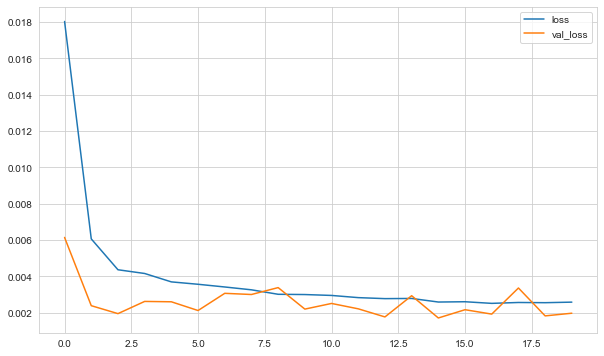

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Import related libraries

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [49]:
y_pred = model.predict(validation_generator)

In [50]:
y_pred

array([[0.2525674 ],
       [0.1935477 ],
       [0.17190322],
       [0.19198874],
       [0.29802388],
       [0.36142856],
       [0.45730674],
       [0.4765119 ],
       [0.46617553],
       [0.4625235 ],
       [0.34821188],
       [0.2658093 ]], dtype=float32)

In [51]:
eval_metrics(test_scaled[-12:], y_pred)

r2_score: 0.8192319958005948 
 mae: 0.037343318442299524 
 mse: 0.0019753714137234943 
 rmse: 0.04444515062100132


In [52]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [53]:
eval_metrics(test_scaled, test_predictions)

r2_score: -0.08605373693457663 
 mae: 0.09990930141434522 
 mse: 0.01271081537140833 
 rmse: 0.11274225193514777


In [54]:
true_predictions = scaler.inverse_transform(test_predictions)

In [55]:
test['Predictions'] = true_predictions

In [56]:
test

,ipn31152n,Predictions
DATE,,
2017-10-01,90.473,91.918
2017-11-01,77.438,89.742
2017-12-01,75.812,94.086
2018-01-01,83.434,104.161
2018-02-01,99.490,114.298
2018-03-01,107.315,122.218
2018-04-01,112.431,128.443
2018-05-01,110.354,131.533
2018-06-01,124.584,129.890


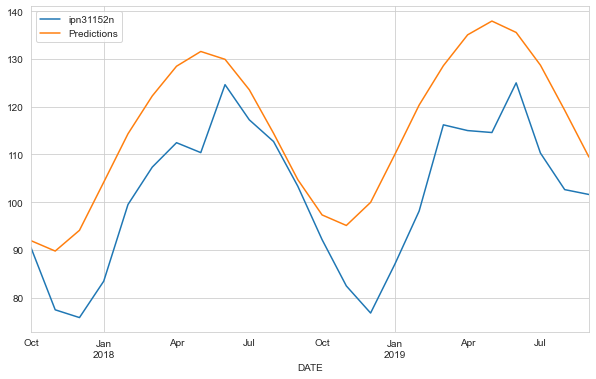

In [57]:
test.plot();

In [58]:
eval_metrics(test.ipn31152n, test.Predictions)

r2_score: -0.08605373693457508 
 mae: 13.73891768376212 
 mse: 240.36244266330232 
 rmse: 15.503626758384708


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [60]:
n_features = 1

In [61]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features))) 
model.add(Dense(1))  # 2 değeri karşılaştıracağım için çıkış layer ında 1 nöron olmalı.
model.compile(optimizer = 'adam', loss = 'mse')

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [65]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [66]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 6s 7ms/step - loss: 0.0188 - val_loss: 0.0025
Epoch 2/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0064 - val_loss: 0.0047
Epoch 3/20
537/537 [==============================] - 4s 8ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 4/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 5/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 6/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 7/20
537/537 [==============================] - 4s 8ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 8/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 9/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 10/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0032 - val_loss: 0.0018

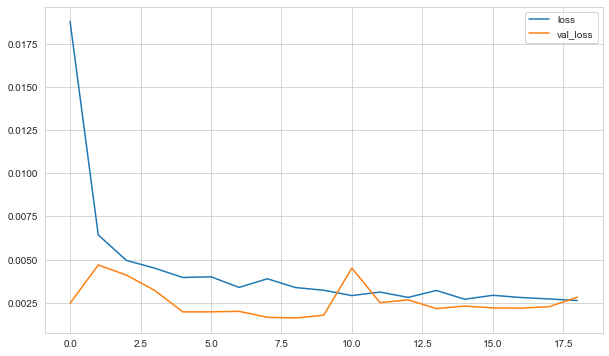

In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [71]:
y_pred = model.predict(validation_generator)

In [72]:
y_pred

array([[0.25875494],
       [0.20614359],
       [0.1942184 ],
       [0.23206364],
       [0.33621788],
       [0.40295458],
       [0.47520483],
       [0.48953396],
       [0.47248703],
       [0.47321564],
       [0.38191062],
       [0.2931291 ]], dtype=float32)

In [73]:
test_scaled[-12:]

array([[0.2434103 ],
       [0.17289089],
       [0.13163033],
       [0.20608099],
       [0.28689318],
       [0.41822681],
       [0.40948951],
       [0.40651527],
       [0.48213817],
       [0.37525952],
       [0.3195946 ],
       [0.31216335]])

In [74]:
eval_metrics(test_scaled[-12:], y_pred)

r2_score: 0.7426677603316572 
 mae: 0.044954711592703256 
 mse: 0.0028120394000121407 
 rmse: 0.05302866583285064


In [75]:
test_predictions = []

first_eval_batch = train_scaled[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [76]:
eval_metrics(test_scaled, test_predictions)

r2_score: -2.4712100159071646 
 mae: 0.18090045595095008 
 mse: 0.04062589918627316 
 rmse: 0.20155867430173566


In [77]:
true_predictions = scaler.inverse_transform(test_predictions)

In [78]:
test['Predictions'] = true_predictions

In [79]:
test

,ipn31152n,Predictions
DATE,,
2017-10-01,90.473,97.965
2017-11-01,77.438,96.661
2017-12-01,75.812,101.185
2018-01-01,83.434,112.874
2018-02-01,99.490,125.332
2018-03-01,107.315,134.279
2018-04-01,112.431,139.000
2018-05-01,110.354,138.228
2018-06-01,124.584,133.736


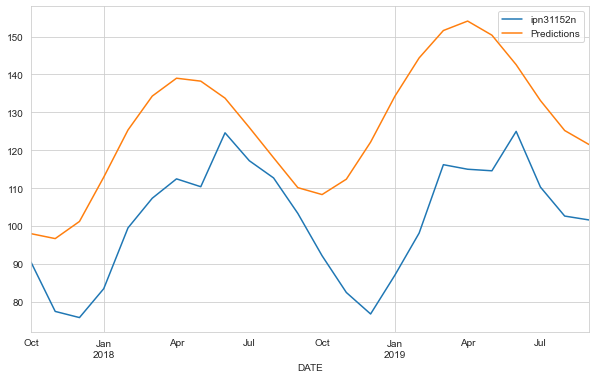

In [80]:
test.plot();

In [81]:
eval_metrics(test.ipn31152n, test.Predictions)

r2_score: -2.4712100159071606 
 mae: 24.876327209593352 
 mse: 768.2387068394459 
 rmse: 27.717119382061437


In [82]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [83]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [84]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 6s 7ms/step - loss: 0.0247
Epoch 2/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0078
Epoch 3/15
561/561 [==============================] - 4s 8ms/step - loss: 0.0073
Epoch 4/15
561/561 [==============================] - 4s 8ms/step - loss: 0.0060
Epoch 5/15
561/561 [==============================] - 4s 8ms/step - loss: 0.0040
Epoch 6/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0040
Epoch 7/15
561/561 [==============================] - 5s 8ms/step - loss: 0.0034
Epoch 8/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0036
Epoch 9/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0032
Epoch 10/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0034
Epoch 11/15
561/561 [==============================] - 5s 8ms/step - loss: 0.0030
Epoch 12/15
561/561 [==============================] - 4s 8ms/step - loss: 0.0029
Epoch 13/15
561/561 [====

In [86]:
scaled_full_data.shape

(573, 1)

In [87]:
scaled_full_data[-length:].shape

(12, 1)

In [88]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:] 

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [89]:
forecast = scaler.inverse_transform(forecast)

In [90]:
forecast

array([[ 87.62718868],
       [ 80.53692083],
       [ 78.53590501],
       [ 85.79558154],
       [ 96.47615611],
       [105.0555827 ],
       [111.42415982],
       [116.68097633],
       [117.73198472],
       [112.12962975],
       [103.59891066],
       [ 92.77559872]])

In [91]:
forecast_index = pd.date_range(start = '2019-10-01', periods = periods, freq = 'MS')

In [92]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [94]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

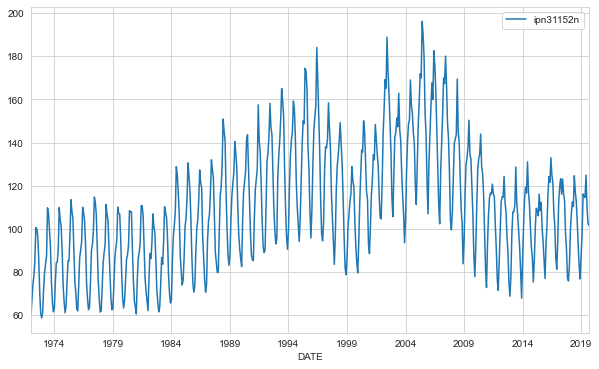

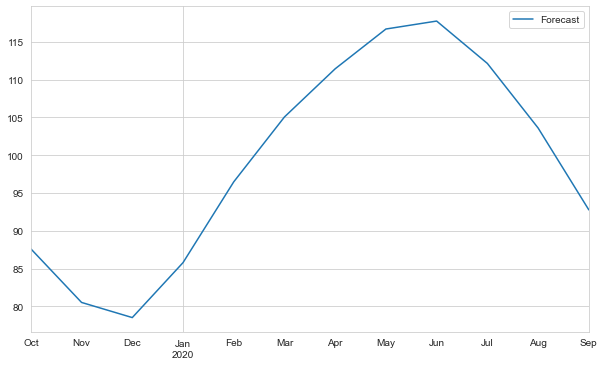

In [95]:
df.plot()
forecast_df.plot();

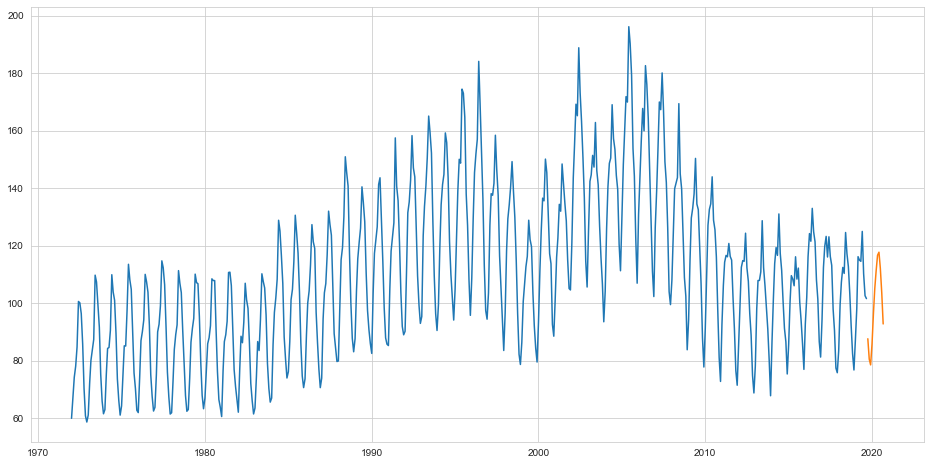

In [96]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['ipn31152n'])
plt.plot(forecast_df.index, forecast_df['Forecast'])


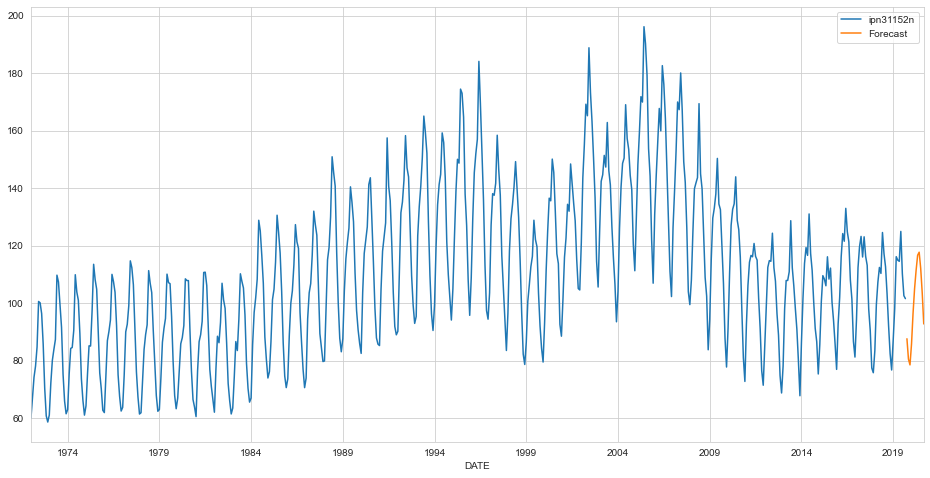

In [97]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));